Que2.-
In this dataset you have to predict that whether we have to give ATTORNEY to the clients or not (0=Yes, 1=No) based on below factors.
CLMAGE - Age of Client
CLMSEX - Sex of client (0=Male, 1= Female)
SEATBELT - Whether client has Seatbelt or not (0=Yes, 1=No)
CLMINSUR - Whether Client give Insurance or not (0=Yes, 1=No)
LOSS - Loss that client faced

Prepare model by using logistic regression & Also calculate Accuracy by confusion matrix, Calculate accuracy score, precision score, recall score, f1 score, roc auc score. Also Visualize the result. Also select best parameters using gridsearchCV. 

Dataset : Claimants.csv

### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [2]:
df = pd.read_csv('claimants.csv')
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


### exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [4]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [5]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
df.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [8]:
# check if the data is balanced
df['ATTORNEY'].value_counts()

ATTORNEY
0    578
1    518
Name: count, dtype: int64

In [10]:
df.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.097475,0.084609,-0.060795,0.001132,-0.225769
CLMSEX,0.097475,1.000000,0.058164,-0.017814,-0.017942,-0.029742
CLMINSUR,0.084609,0.058164,1.000000,0.021217,0.048166,0.019502
SEATBELT,-0.060795,-0.017814,0.021217,1.000000,-0.028343,0.131182
CLMAGE,0.001132,-0.017942,0.048166,-0.028343,1.000000,0.065513
LOSS,-0.225769,-0.029742,0.019502,0.131182,0.065513,1.000000


In [32]:
x = df.drop(['SEATBELT','ATTORNEY','CLMSEX'],axis=1)
y = df['ATTORNEY']

In [33]:
# split the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
        x, y, train_size=0.7, random_state=123456)

### train the model

In [34]:
from sklearn.linear_model import LogisticRegression

# create the model
model = LogisticRegression(max_iter=1000)

# train the model
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

### model evaulation

In [35]:
y_pred = model.predict(x_test)
y_true = y_test

#### confusion matrix

In [36]:
# create confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
cm

array([[113,  62],
       [ 46, 108]], dtype=int64)

#### accuracy

In [37]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
accuracy

0.6717325227963525

#### precision

In [38]:
from sklearn.metrics import precision_score

# calcuate the positive precision
precision = precision_score(y_true, y_pred)
precision

0.6352941176470588

#### recall

In [39]:
from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred)
recall

0.7012987012987013

### F1 score

In [40]:
f1_positive = 2 * ((precision * recall) / (precision + recall))
f1_positive

0.6666666666666666

### Auc RoC

In [41]:
from sklearn.metrics import roc_auc_score

score = roc_auc_score(y_true, y_pred)
score

0.6735064935064935

### result visualization

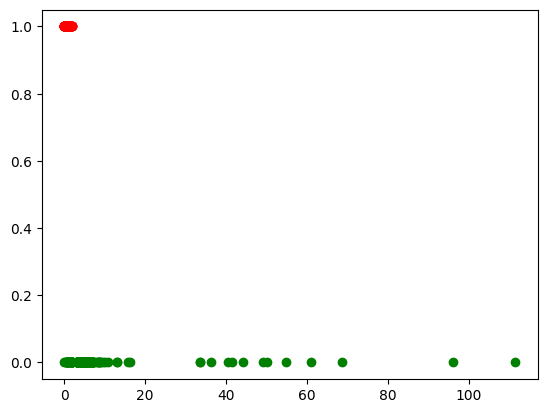

In [42]:
plt.scatter(
    x_test['LOSS'][y_pred == 0], 
    y_pred[y_pred == 0], 
    color="green")

plt.scatter(
    x_test['LOSS'][y_pred == 1], 
    y_pred[y_pred == 1], 
    color="red")

### model optimization

In [43]:
# this section will try to find the optimal values of hyper parameters of LogisticRegression
from sklearn.model_selection import GridSearchCV

# create a dictionary with all possible hyperparamters along with their possible values
hyper_parameters = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": [10, 5, 1.0, 0.1, 0.01, 0.001],
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

# create a grid search object
grid_search_cv = GridSearchCV(estimator=model, param_grid=hyper_parameters)

In [44]:
grid_search_cv

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [10, 5, 1.0, 0.1, 0.01, 0.001],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [45]:
# do the permutations and combinations of hyper parameters and their values
grid_search_cv.fit(x_train, y_train)

C:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\P

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [10, 5, 1.0, 0.1, 0.01, 0.001],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [46]:
grid_search_cv.best_score_

0.722264663441134

In [47]:
grid_search_cv.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}